In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Shifting all data from xls format into cleaned up df
lebron_reg_datalist = pd.read_html("data_files/Lebron_Regular_Season.xls")
lebron_reg_data = ""
for i in lebron_reg_datalist:
    lebron_reg_data = i
lebron_reg_data = lebron_reg_data[:22]


jordan_reg_datalist = pd.read_html("data_files/Jordan_Regular_Season.xls")
jordan_reg_data = ""
for i in jordan_reg_datalist:
    jordan_reg_data = i
jordan_reg_data = jordan_reg_data[:19]

lebron_reg_data.columns


Index(['Season', 'Age', 'Team', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')

In [51]:
# Find out mvp award placing of both players for each season

lebron_reg_data = lebron_reg_data[['Season','Awards']]
lebron_reg_awards=lebron_reg_data['Awards'].str.split(',').apply(pd.Series)
lebron_reg_awards['Season'] = lebron_reg_data['Season'] 
lebron_reg_awards = lebron_reg_awards.drop([lebron_reg_awards.columns[1],lebron_reg_awards.columns[2],lebron_reg_awards.columns[3]],axis=1)
lebron_reg_awards.iloc[:, 0] = lebron_reg_awards.iloc[:, 0].apply(lambda x: x if str(x).startswith('MVP-') else np.nan)
lebron_reg_awards.columns = ["Lebron Standings","Lebron Season"]


jordan_reg_data = jordan_reg_data[['Season','Awards']]
jordan_reg_awards=jordan_reg_data['Awards'].str.split(',').apply(pd.Series)
jordan_reg_awards['Season'] = jordan_reg_data['Season'] 
jordan_reg_awards = jordan_reg_awards.drop([jordan_reg_awards.columns[1],jordan_reg_awards.columns[2],jordan_reg_awards.columns[3]],axis=1)
jordan_reg_awards.iloc[:, 0] = jordan_reg_awards.iloc[:, 0].apply(lambda x: x if str(x).startswith('MVP-') else np.nan)
jordan_reg_awards.columns = ["Jordan Standings","Jordan Season"]

mvp_awards =  pd.concat([lebron_reg_awards, jordan_reg_awards], axis=1)
mvp_awards


,Lebron Standings,Lebron Season,Jordan Standings,Jordan Season
0,MVP-9,2003-04,MVP-6,1984-85
1,MVP-6,2004-05,NaN,1985-86
2,MVP-2,2005-06,MVP-2,1986-87
3,MVP-5,2006-07,MVP-1,1987-88
4,MVP-4,2007-08,MVP-2,1988-89
5,MVP-1,2008-09,MVP-3,1989-90
6,MVP-1,2009-10,MVP-1,1990-91
7,MVP-3,2010-11,MVP-1,1991-92
8,MVP-1,2011-12,MVP-3,1992-93
9,MVP-1,2012-13,NaN,1993-94


In [54]:
mvp_awards['Lebron MVP Placing'] = mvp_awards['Lebron Standings'].str.split('-').str[-1]
mvp_awards['Jordan MVP Placing'] = mvp_awards['Jordan Standings'].str.split('-').str[-1]

# mvp_awards[['Lebron MVP Placing', 'Jordan MVP Placing']] = mvp_awards[['Lebron MVP Placing', 'Jordan MVP Placing']].apply(pd.to_numeric, errors='coerce').astype('Int64')
mvp_awards = mvp_awards[['Lebron Season', 'Lebron Standings', 'Lebron MVP Placing', 'Jordan Season', 'Jordan Standings', 'Jordan MVP Placing']]
mvp_awards.head()

,Lebron Season,Lebron Standings,Lebron MVP Placing,Jordan Season,Jordan Standings,Jordan MVP Placing
0,2003-04,MVP-9,9,1984-85,MVP-6,6
1,2004-05,MVP-6,6,1985-86,NaN,NaN
2,2005-06,MVP-2,2,1986-87,MVP-2,2
3,2006-07,MVP-5,5,1987-88,MVP-1,1
4,2007-08,MVP-4,4,1988-89,MVP-2,2


TypeError: 'value' must be an instance of str or bytes, not a float

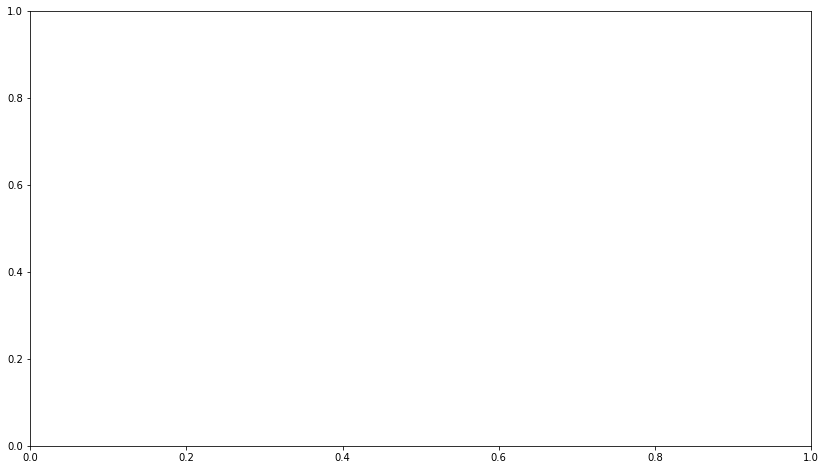

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Replace zeros with NaN in both columns to ensure the line breaks at zero
mvp_awards['Lebron MVP Placing'] = mvp_awards['Lebron MVP Placing'].replace(0, np.nan)
mvp_awards['Jordan MVP Placing'] = mvp_awards['Jordan MVP Placing'].replace(0, np.nan)

# Create a figure and plot
plt.figure(figsize=(14, 8))

# Plot LeBron MVP Placing over Time (x-axis will be the row number)
plt.plot(mvp_awards.index + 1, mvp_awards['Lebron MVP Placing'], marker='o', color='red', label="LeBron MVP Placing")

# Plot Jordan MVP Placing over Time (x-axis will be the row number)
plt.plot(mvp_awards.index + 1, mvp_awards['Jordan MVP Placing'], marker='o', color='blue', label="Jordan MVP Placing")

# Customize the chart
plt.title("MVP Placing Over Time: LeBron vs. Jordan", fontsize=14)
plt.xlabel("Season Number (Row Number)", fontsize=12)
plt.ylabel("MVP Placing (Lower is Better)", fontsize=12)

# Set x-ticks to be the row number, starting from 1
plt.xticks(mvp_awards.index + 1, rotation=45, ha='right', fontsize=10)  # x-axis is season number (row number)

# Ensure y-axis ticks are in the range from 1 to 10, as MVP placing typically ranges from 1 to 10
plt.yticks(np.arange(1, 11, 1))  

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
